In [5]:
from asyncio import as_completed
import numpy as np
import matplotlib.pyplot as plt


font = {'size': 15}

plt.rc('font', **font)

## Directions for generating vectors:
• Take D = 10.<br>
• Write a function to generate a D-dimensional vector where each component is drawn from a standard normal
  distribution.<br>
• Use this function to generate c.<br>
• Generate a D × D matrix A, where every column is a vector generated in this way. • Take Q = ATA.<br>

In [70]:
def vector_Generator(D):
    c = np.random.standard_normal(D)
    A = []
    for i in range(D):
        A.append(np.random.standard_normal(D))
        
    Q = np.matmul(np.transpose(A), A)
   
    x = np.random.standard_normal(D)
   
    return c, Q, x
    

## Explain why Q is almost certainly positive definite when generated this way.

<b>Q = A<sup>T</sup>A</b>, where A is a matrix generated with each column is generated using standard normal distribution. This implies that columns of A are linearly independant. This also means that <b>A<u>x</u> != 0</b> when <b><u>x</u> != 0</b>,  <b>||A<u>x</u>|| > 0</b>.

We also know that since Q will be a real symmetric matrix, it will be positive semi definite. 

So, when we generate Q using A<sup>T</sup>A, we are sure to get Q to be positive definite.

# Implementing Vanilla Gradient Descent

#### For an α > 0 small enough to guarantee convergence, implement gradient descent for this problem. Plot the error of ||x<sup>k</sup> − x<sup>∗</sup>||, and show that it agrees with the exponential convergence we expect from the results in class. How can you verify this?

#### Additionally, we’d like to know in what manner the iterates converge to the minimum. In going from x<sup>k</sup> to x<sup>k+1</sup>, are we aimed directly at the minimizer x∗, or are we off slightly? We can understand this by looking at the angle between x<sup>k+1</sup> − x<sup>k</sup> and x<sup>∗</sup> − x<sup>k</sup>. To get at this angle, we can plot [x<sup>k+1</sup> − x<sup>k</sup>]<sup>T</sup> [x<sup>∗</sup> − x<sup>k</sup>] / ||x<sup>k+1</sup> − x<sup>k</sup>|| ||x<sup>∗</sup> − x<sup>k</sup>|| as a function of k. What does the plot suggest about how the iterates approach the minimizer?

In [21]:
def calculate_Diff_Norm(X1, X2):
    XDiff = np.subtract(X1, X2)
    return np.linalg.norm(XDiff, ord = 2)

def calculate_Prod1(X1, X2, X3):
    X1X2_Transpose = np.transpose(np.subtract(X1, X2))
    X2X3_Diff = np.subtract(X3, X2)
    return np.matmul(X1X2_Transpose, X2X3_Diff)

In [87]:
def vanilla_Gradient_Descent(Q, c, x, alpha, XStar):
    XArray = [];
    AngleArray = [];
    errorArray = [];
    error = 10000;
    iterations = 0;
    XStarNorm = np.linalg.norm(XStar, ord = 2)
    while(error > 0.0001):
        derivative = np.subtract(np.matmul(Q,x), c)
        newX = np.subtract(x, np.dot(alpha, derivative))
        newXNorm = np.linalg.norm(newX, ord = 2)
        XArray.append(newXNorm)
        
        divisor = calculate_Diff_Norm(newX, x)*calculate_Diff_Norm(XStar, x)
        dividend = calculate_Prod1(newX, x, XStar)
        angle = dividend/divisor
        AngleArray.append(angle)
        x = newX
        
        error = abs(newXNorm - XStarNorm)
        errorArray.append(error)
        iterations += 1
    
    print('Number of Iterations - ', iterations)
    return XArray, AngleArray, errorArray


In [9]:
def plot_Error_Plot(errorArray):

    plt.figure(figsize=(14,7))
    plt.subplot(1,2,1)
    plt.plot(errorArray)
    plt.title('Error Plot(Linear Scale)', fontsize=16)
    plt.xlabel('Time(Iterations) ->', fontsize=16)
    plt.ylabel('Loss Value ->', fontsize=16)
    
    
    plt.subplot(1,2,2)
    plt.plot(errorArray)
    plt.title('Error Plot(Log Scale)', fontsize=20)
    plt.xlabel('Time(Iterations) ->', fontsize=16)
    plt.ylabel('Loss Value ->', fontsize=16)
    plt.yscale('log')
    plt.xscale('log')
    plt.show()
    
def plot_Angle_Plot(AngleArray):
    plt.figure(figsize=(14,7))
    plt.subplot(1,2,1)
    plt.plot(AngleArray)
    plt.ylabel('Angle ->', fontsize = 16)
    plt.xlabel('Time(Iterations) ->', fontsize = 16)
    plt.title('Angle Plot(Linear Scale)', fontsize = 20)
    
    plt.subplot(1,2,2)
    plt.plot(AngleArray)
    plt.title('Angle Plot(Log Scale)', fontsize=20)
    plt.xlabel('Time(Iterations) ->', fontsize=16)
    plt.ylabel('Angle ->', fontsize=16)
    plt.xscale('log')
    plt.show()

In [75]:
c, Q, x = vector_Generator(10)


Number of Iterations -  35328


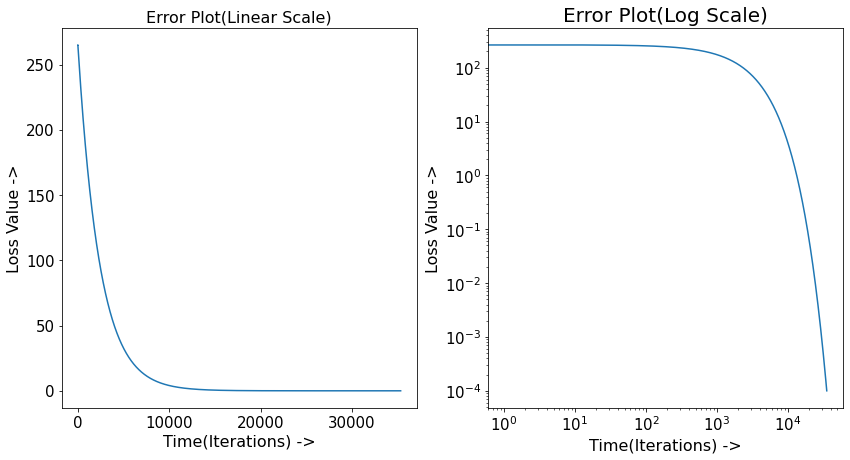

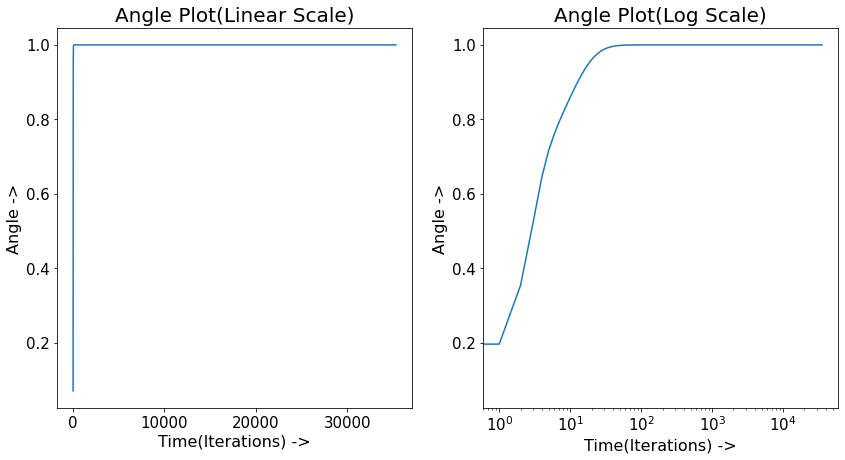

In [88]:
XStar = np.matmul(np.linalg.inv(Q), c)


XArr, AngArr, ErrorArray = vanilla_Gradient_Descent(Q, c, x, 0.05, XStar)

plot_Error_Plot(ErrorArray)
plot_Angle_Plot(AngArr)

Here we implement a vanilla gradient descent algorithm with <b>step size(α)</b> as <b>0.05</b>. It takes <b>35328</b> iterations to reach error difference (<b>||x - x<sup>*</sup>||</b>) of <b>10<sup>-4</sup></b>.

As seen in <b>Error Plot</b> above in Linear Scale, we are able to see that the loss value decreases exponentially. In Log Scale Error Plot above, we are further clearly able to see how rapidly the error rate falls once it crosses 10<sup>3</sup> iterations. Thus we can conclude that gradient descent agrees with the exponential convergence we expect from the results in class. 

We also plot the <b>Angle Plot</b> for <b>x<sup>k</sup> and x<sup>k-1</sup></b> using the formula <b>[x<sup>k+1</sup> − x<sup>k</sup>]<sup>T</sup> [x<sup>∗</sup> − x<sup>k</sup>] / ||x<sup>k+1</sup> − x<sup>k</sup>|| ||x<sup>∗</sup> − x<sup>k</sup>||</b>. 
We can see from the linear scale and log scale angle plots that the as the value of x<sup>k</sup> approaches the minimum, the gradient of x<sup>k</sup> also starts approaching the minimum and the angles starts becoming similar. As the iterates go on, difference between the angle of x<sup>k</sup> and x<sup>*</sup> start decreasing.<br><br>

### Are the rates of convergence of the iterates and the behavior of the approach consistent across different starting points, stepsizes, and Q, c choices?

Below we try to run gradient descent with different step sizes, starting points and Q, c choices.

### Different Step Size

Here we take the step size to be 0.04.

Number of Iterations -  44162


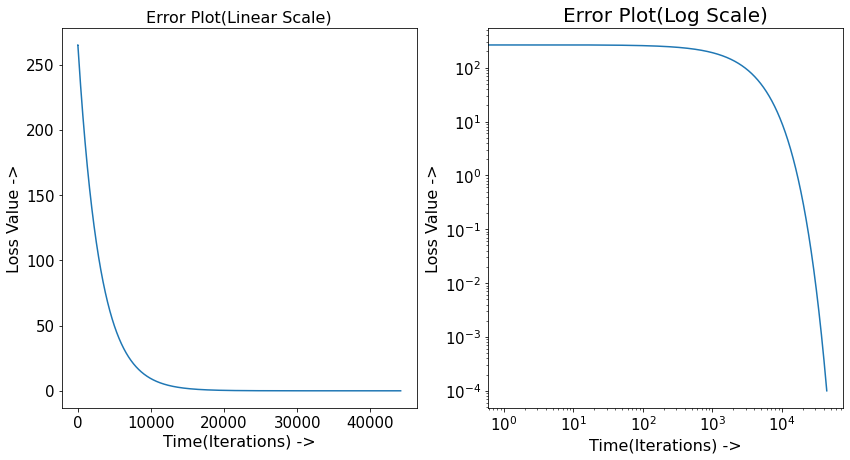

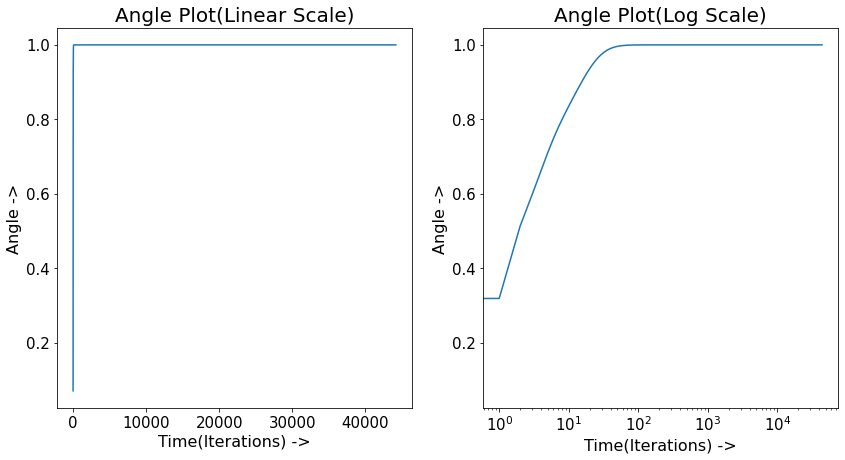

In [89]:
XArr2, AngArr2, ErrorArray2 = vanilla_Gradient_Descent(Q, c, x, 0.04, XStar)

plot_Error_Plot(ErrorArray2)
plot_Angle_Plot(AngArr2)

### Different starting point.

35355


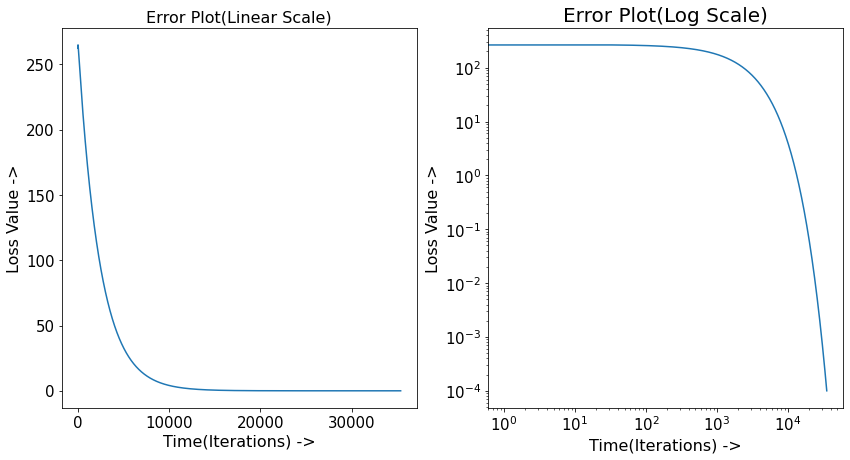

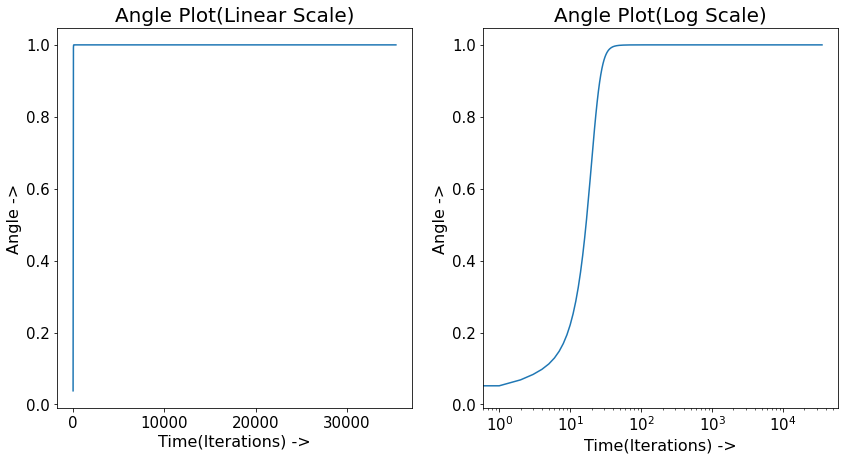

In [78]:
x3 = np.random.standard_normal(10)
XArr3, AngArr3, ErrorArray3 = vanilla_Gradient_Descent(Q, c, x3, 0.05, XStar)

plot_Error_Plot(ErrorArray3)
plot_Angle_Plot(AngArr3)

### Different Q, C and Starting Point

In [79]:
c4, Q4, x4 = vector_Generator(10)


4445


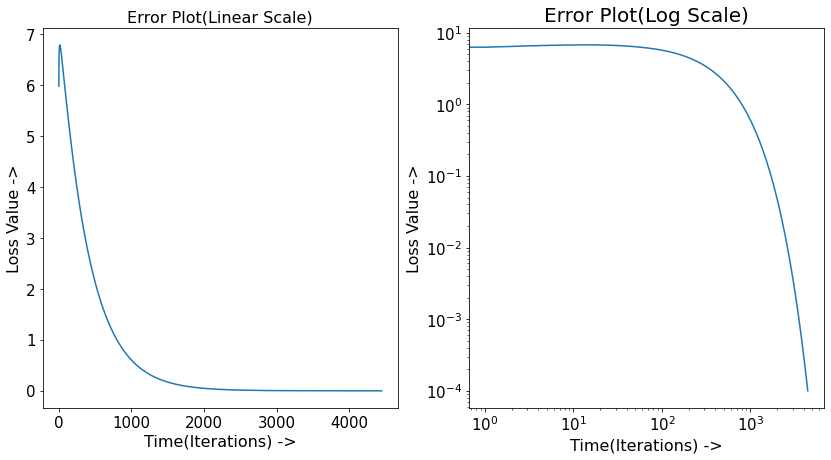

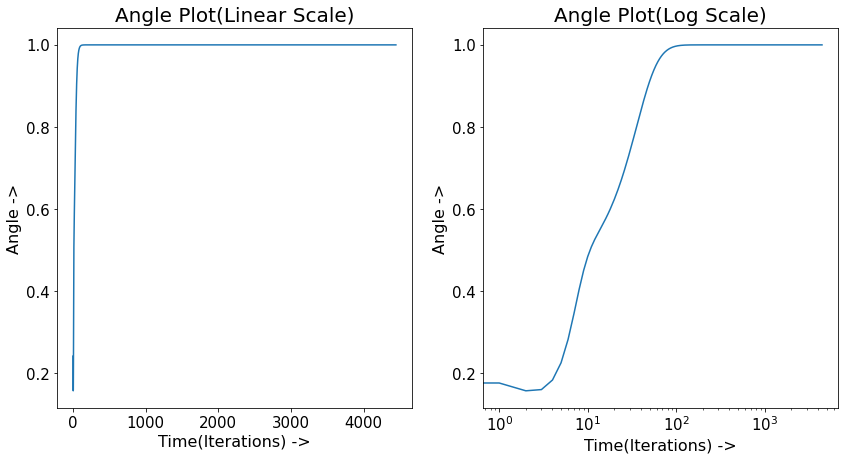

In [80]:

XStar4 = np.matmul(np.linalg.inv(Q4), c4)
XArr4, AngArr4, ErrorArray4 = vanilla_Gradient_Descent(Q4, c4, x4, 0.05, XStar4)

plot_Error_Plot(ErrorArray4)
plot_Angle_Plot(AngArr4)

#### As we can see all the plots above for different cases, we can clearly see that the behavior of the approach of gradient descent is the same across all the cases. The descent is exponential and the difference of angle of x and x<sup>*</sup> becomes neglegible. Hence, the behaviour of gradient descent is consistent across different cases.<br>

# Taking optimum alpha

### Instead of taking α as a constant, take α<sup>k</sup> to be the optimal stepsize for gradient descent as found previously.

Here we take α as the optimal α calculated in each iteration from the following formula:
α<sub>k</sub> = 2 (<u>p<sub>k</sub><sup>T</sup></u>) (<u>p<sub>k</sub></u>) / (<u>p<sub>k</sub><sup>T</sup></u>) Q (<u>p<sub>k</sub></u>). 

In [92]:
def opt_Alpha_Gradient_Descent(Q, c, x, alpha, XStar):
    XArray = [];
    AngleArray = []; 
    iterations = 0;
    error = 10000;
    errorArray = [];
    XStarNorm = np.linalg.norm(XStar, ord = 2)
    while(error > 0.0001):
        derivative = np.subtract(np.matmul(Q,x), c)
        deriv_Squared = np.matmul(np.transpose(derivative), derivative)
        divisor = np.matmul(np.matmul(np.transpose(derivative), Q), derivative)
        opt_Alpha = (2*(deriv_Squared/divisor))
        newX = np.subtract(x, np.dot(opt_Alpha, derivative))
        newXNorm = np.linalg.norm(newX, ord = 2)
        XArray.append(newXNorm)
        
        divisor = calculate_Diff_Norm(newX, x)*calculate_Diff_Norm(XStar, x)
        dividend = calculate_Prod1(newX, x, XStar)
        angle = dividend/divisor
        AngleArray.append(angle)

        x = newX

        error = abs(newXNorm - XStarNorm)
        errorArray.append(error)
        iterations += 1
        
    print('Number of Iterations - ', iterations)
    return XArray, AngleArray, errorArray

Number of Iterations -  20043


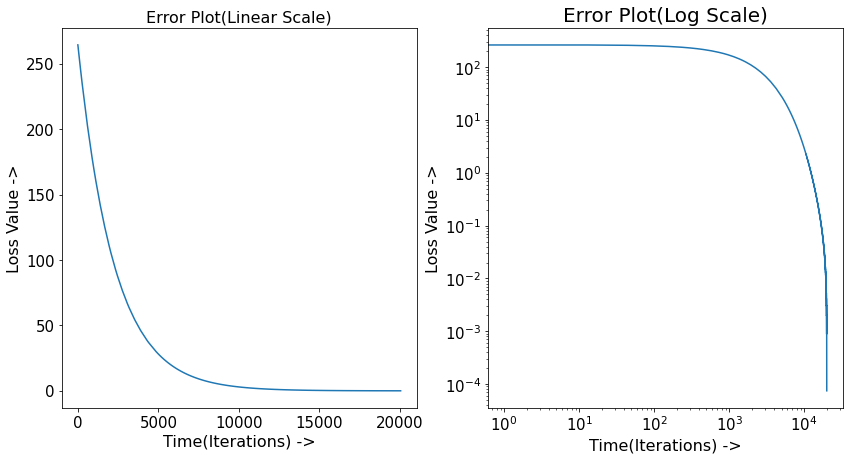

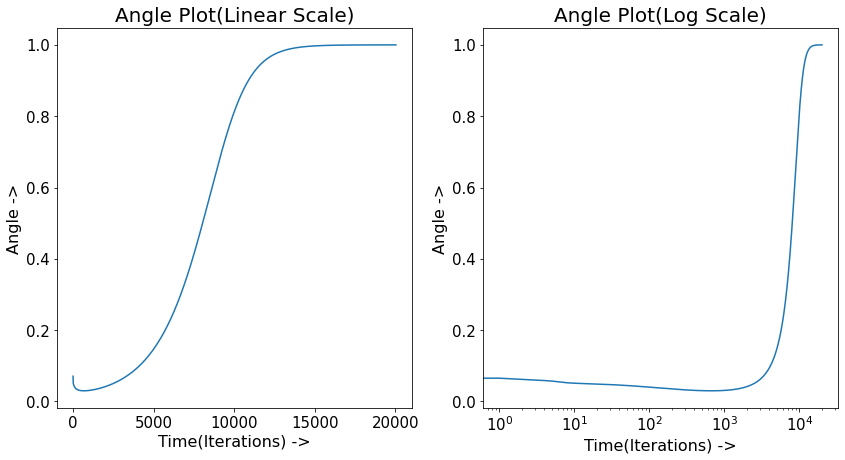

In [93]:
XArr_Opt, AngArr_Opt, ErrorArr_Opt = 
opt_Alpha_Gradient_Descent(Q, c, x, 0.05, XStar)

plot_Error_Plot(ErrorArr_Opt)
plot_Angle_Plot(AngArr_Opt)

For the same input, <b>Vanilla Gradient Descent</b> with fixed <b>α = 0.05</b> takes 35328 iterations to reach an error difference of 10<sup>-4</sup> whereas <b>Gradient Descent with Optimized α</b> takes 20043 iterations. We can clearly see that <b>Gradient Descent with Optimized α is faster than Vanilla Gradient Descent</b>. 

Number of Iterations -  1452


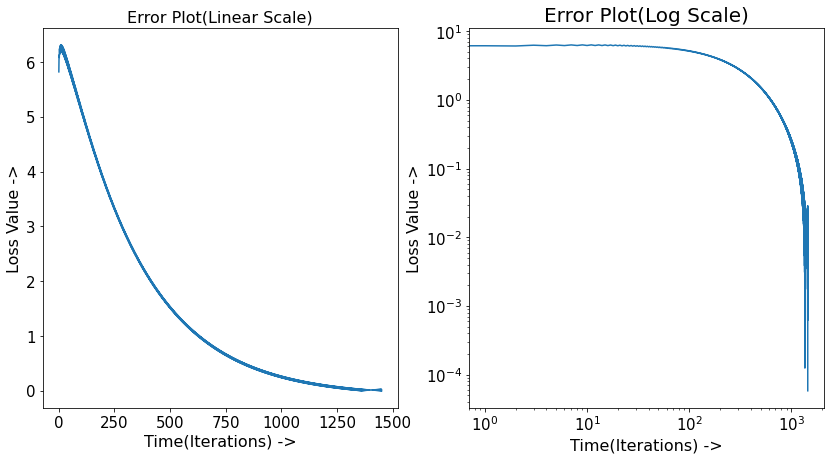

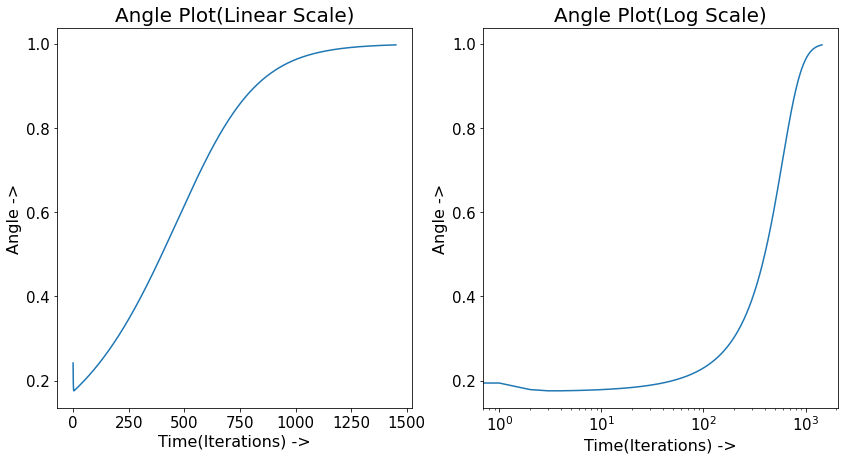

In [94]:
XArr_Opt_2, AngArr_Opt_2, ErrorArray_Opt_2 = 
opt_Alpha_Gradient_Descent(Q4, c4, x4, 0.05, XStar4)

plot_Error_Plot(ErrorArray_Opt_2)
plot_Angle_Plot(AngArr_Opt_2)

As we can see in the plots above for different cases, we can clearly see that the behavior of the approach of gradient descent with optimized α is the same. The descent is exponential and the difference of angle of x and x* becomes neglegible. Hence, it can be said that the behaviour of gradient descent with optimized α is consistent across different cases.

# Momentum Descent

In [109]:
def vanilla_Momentum_Descent(Q, c, x, alpha, beta, XStar):
    XArray = [];
    AngleArray = []; 
    iterations = 0;
    error = 10000;
    errorArray = [];
    XStarNorm = np.linalg.norm(XStar, ord = 2)
    XPrev = np.zeros(len(x));
    while(error > 0.0001):
        derivative = np.subtract(np.matmul(Q,x), c)
        Qk = np.subtract(x, XPrev)
        firstPart = np.subtract(x, np.dot(alpha, derivative))
        newX = np.add(firstPart, np.dot(beta, Qk))
        newXNorm = np.linalg.norm(newX, ord = 2)
        XArray.append(newXNorm)
        
        divisor = calculate_Diff_Norm(newX, x)*calculate_Diff_Norm(XStar, x)
        dividend = calculate_Prod1(newX, x, XStar)
        angle = dividend/divisor
        AngleArray.append(angle)
       
        XPrev = x
        x = newX
        
        error = abs(newXNorm - XStarNorm)
        errorArray.append(error)
        iterations += 1
        
    print('Number of iterations - ', iterations)
    return XArray, AngleArray, errorArray

1620


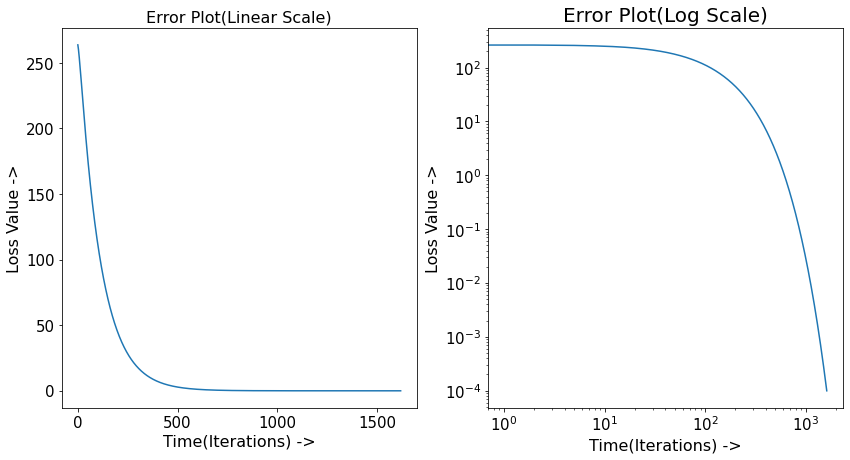

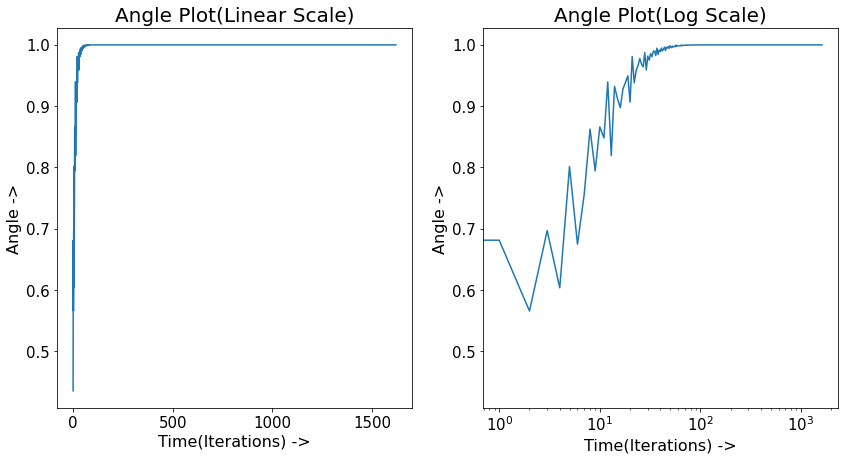

In [82]:
XArr_van_mom, AngArr_van_mom, ErrorArr_van_mom = vanilla_Momentum_Descent(Q, c, x, 0.1, 0.9, XStar)

plot_Error_Plot(ErrorArr_van_mom)
plot_Angle_Plot(AngArr_van_mom)

#### • For a constant α > 0, β > 0, plot the error ||x<sup>k</sup> − x<sup>∗</sup>|| as a function of k to show convergence. How can you find β,α to guarantee convergence? Are these the best constants you can find?
We plot the error graphs for ||x<sup>k</sup> − x<sup>∗</sup>|| as a function of k. We can see from the plot that it converges towards the minimum value. we can choose α > 0, β > 0 by hit and trial such that the plot converges and further solve to find optimized α, β.

#### • For the best α, β you can find in the above question, what can you say about the rate of convergence, and how does it compare to gradient descent? Can you find α,β to make the convergence rate better than vanilla gradient descent? How does it compare to optimized gradient descent?
Using the momentum method, we find the convergence occurs significantly faster than any gradient descent by the order of 10. For the same input, Gradient Descent with Optimal α took almost <b>20000</b> iterations to reach 10<sup>-4</sup> error in difference, whereas Momentum Descent just took <b>1620</b> iterations to reach that value.

#### • Again, plot the angle of approach to the minimizer for these momentum iterates. What can you say about the approach to the minimizer, and how does it compare to the previous results?
We plot the angle of approach to the minimizer as seen in the figure. We see here that there is a bit of noise and the plot is not as smooth. The reason being we are adding a momentum factor that is taking into account the direction (x<sup>k</sup> - x<sup>k-1</sup>), which is in a direction somewhat orthogonal to the direction of x<sup>k</sup>. That is why adding this momentum factor will introduce some noise in angle of approach. We will still converge at the minimum and the angle but there will be some differences. 

#### • Do the trends you observe above generalize, with α, β, Q, c? How does vanilla momentum compare with vanilla gradient descent? With optimized gradient descent?

As seen below in the plots, for different α, β, Q and c, we are still observing the same trends in the plots and the approach of error and the angle.

Using the momentum method, we find the convergence occurs significantly faster than any gradient descent by the order of 10. For the same input, Gradient Descent with Optimal α took almost <b>20000</b> iterations to reach 10<sup>-4</sup> error in difference, whereas Momentum Descent just took <b>1620</b> iterations to reach that value.

404


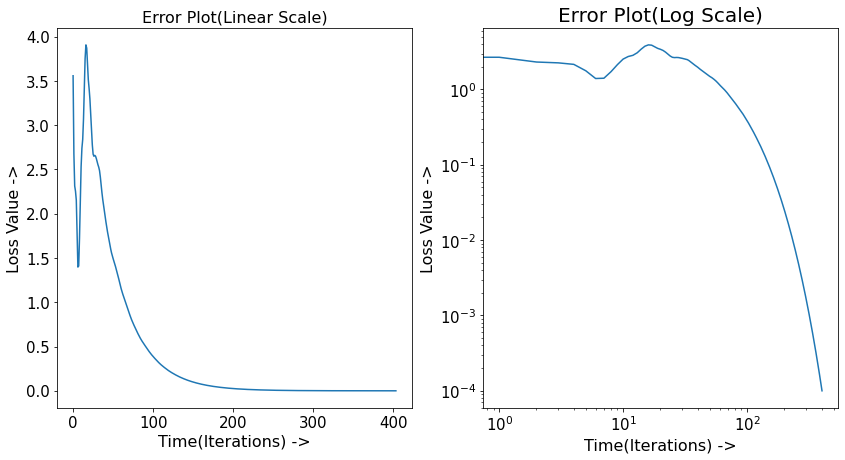

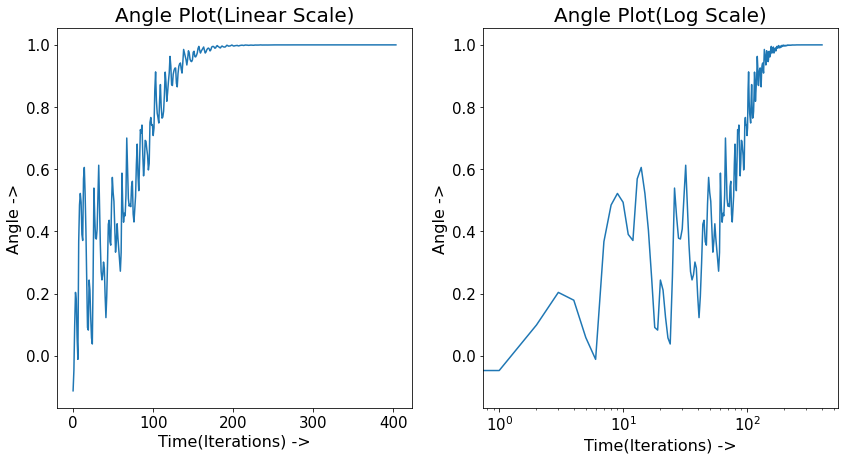

In [100]:
XArr4_van_mom, AngArr4_van_mom, ErrorArr4_van_mom = vanilla_Momentum_Descent(Q4, c4, x4, 0.04, 0.9, XStar4)

plot_Error_Plot(ErrorArr4_van_mom)
plot_Angle_Plot(AngArr4_van_mom)

# Optimized Alpha and Beta

### Repeat the above, but for optimized momentum, using the optimal stepsizes α<sup>k</sup>, β<sup>k</sup> from before.

Here we calculate optimized stepsizes α<sup>k</sup>, β<sup>k</sup> as derived in the formula and use them for the momentum descent. 

In [110]:
def calculate_Product(X1, X2):
    return np.matmul(np.transpose(X1), X2)
    
def calculate_Prod_3(X1, X2, X3):
    return np.matmul(np.matmul(np.transpose(X1), X2), X3)
    
def calculate_Beta(Pk, Q, Qk):
    numerator = (calculate_Product(Pk, Pk)*calculate_Prod_3(Pk, Q, Qk)) - 
    (calculate_Product(Qk, Pk)*calculate_Prod_3(Pk, Q, Pk))
    denominator = (calculate_Prod_3(Qk, Q, Qk)*calculate_Prod_3(Pk, Q, Pk)) - 
    (calculate_Prod_3(Pk, Q, Qk)*calculate_Prod_3(Pk, Q, Qk))
    return numerator/denominator
    
    
def calculate_Alpha(Pk, Q, Qk):
    numerator = (calculate_Product(Pk, Pk)*calculate_Prod_3(Qk, Q, Qk)) - 
    (calculate_Product(Qk, Pk)*calculate_Prod_3(Pk, Q, Qk))
    denominator = (calculate_Prod_3(Qk, Q, Qk)*calculate_Prod_3(Pk, Q, Pk)) - 
    (calculate_Prod_3(Pk, Q, Qk)*calculate_Prod_3(Pk, Q, Qk))
    return numerator/denominator

def optimized_Momentum_Descent(Q, c, x, alpha, beta, XStar):
    XArray = [];
    AngleArray = []; 
    iterations = 0;
    error = 10000;
    errorArray = [];
    XStarNorm = np.linalg.norm(XStar, ord = 2)
    XPrev = np.zeros(len(x));
    while(error > 0.000001):
        derivative = np.subtract(np.matmul(Q,x), c)
        Qk = np.subtract(x, XPrev)
        opt_Alpha = calculate_Alpha(derivative, Q, Qk)
        opt_Beta = calculate_Beta(derivative, Q, Qk)
        firstPart = np.subtract(x, np.dot(opt_Alpha, derivative))
        newX = np.add(firstPart, np.dot(opt_Beta, Qk))
        newXNorm = np.linalg.norm(newX, ord = 2)
        XArray.append(newXNorm)
        
        divisor = calculate_Diff_Norm(newX, x)*calculate_Diff_Norm(XStar, x)
        dividend = calculate_Prod1(newX, x, XStar)
        angle = dividend/divisor
        AngleArray.append(angle)
       
        XPrev = x
        x = newX
        
        error = abs(newXNorm - XStarNorm)
        errorArray.append(error)
        iterations += 1
        
    print('Number of iterations - ', iterations)   
    return XArray, AngleArray, errorArray

Number of iterations -  110


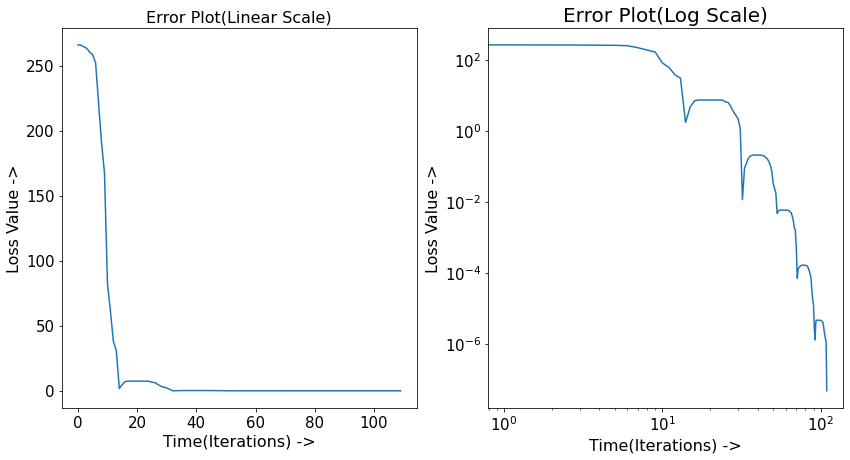

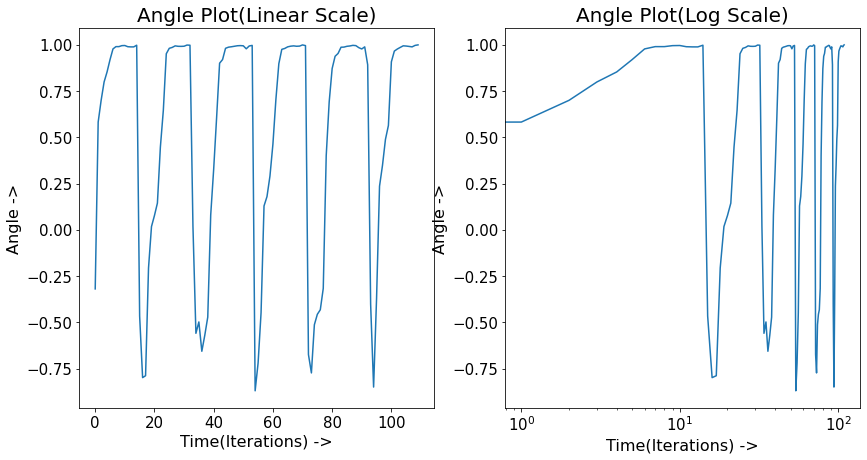

In [111]:
XArr_Opt_mom, AngArr_Opt_mom, ErrorArr_Opt_mom = 
optimized_Momentum_Descent(Q, c, x, 0.1, 0.9, XStar)

plot_Error_Plot(ErrorArr_Opt_mom)
plot_Angle_Plot(AngArr_Opt_mom)

Number of iterations -  51


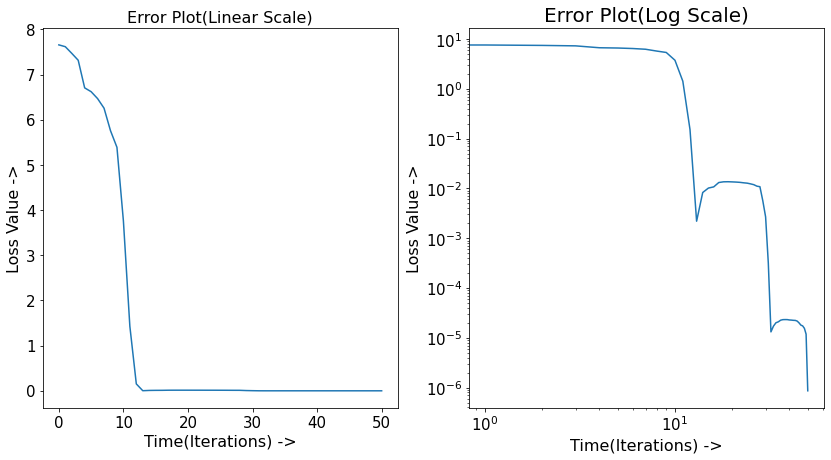

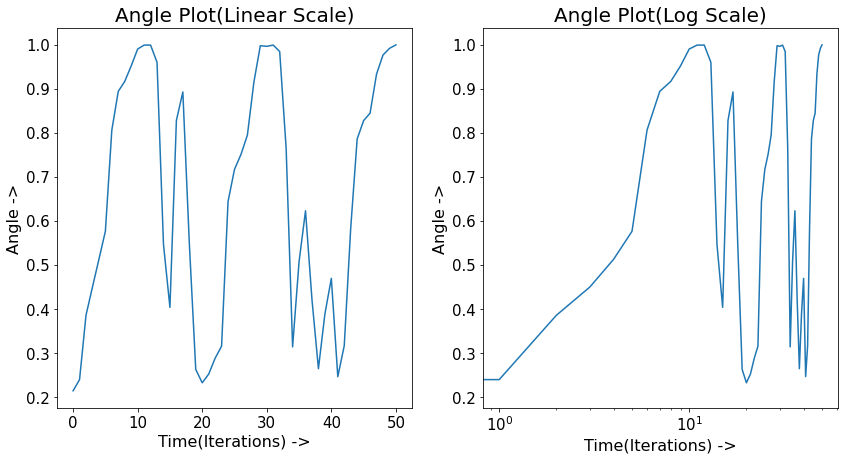

In [112]:
XArr4_Opt_mom, AngArr4_Opt_mom, ErrorArr4_Opt_mom = 
optimized_Momentum_Descent(Q4, c4, x4, 0.04, 0.9, XStar4)

plot_Error_Plot(ErrorArr4_Opt_mom)
plot_Angle_Plot(AngArr4_Opt_mom)

# Generating Orthogonal Vectors

### Given a vector <u>p</u><sub>k</sub>, how can we generate an <u>q</u><sub>k</sub> that is orthogonal to <u>p</u><sub>k</sub>?

To generate a vector orthogonal to a vector U, we can use Gram Schmidt Orthogonalization. We use a vector V and remove all the projection of U on V. The formula states that: <br>
U_New = V - Proj<sub>U</sub>(V) <br>
Proj<sub>U</sub>(V) = (U<sup>T</sup>V)/(U<sup>T</sup>U) . U<br>

In [63]:

def gram_Schmidt_Transform(Pk, X, XPrev):
    V2 = np.random.standard_normal(10)
    #V2 = np.subtract(X, XPrev)
    secondPart = np.dot((calculate_Product(Pk, V2)/calculate_Product(Pk, Pk)), Pk)
    U2 = np.subtract(V2, secondPart)
    return U2


In [113]:
def optimized_OrthQ_Momentum_Descent(Q, c, x, alpha, beta, XStar):

    XArray = [];
    AngleArray = []; 
    iterations = 0;
    error = 10000;
    errorArray = []
    XStarNorm = np.linalg.norm(XStar, ord = 2)
    XPrev = np.random.standard_normal(len(x))
    while(error > 0.000001):
        derivative = np.subtract(np.matmul(Q,x), c)
        Qk = gram_Schmidt_Transform(derivative, x, XPrev)
        opt_Alpha = calculate_Alpha(derivative, Q, Qk)
        opt_Beta = calculate_Beta(derivative, Q, Qk)
        firstPart = np.subtract(x, np.dot(opt_Alpha, derivative))
        newX = np.add(firstPart, np.dot(opt_Beta, Qk))
        newXNorm = np.linalg.norm(newX, ord = 2)
        XArray.append(newXNorm)
        
        divisor = calculate_Diff_Norm(newX, x)*calculate_Diff_Norm(XStar, x)
        dividend = calculate_Prod1(newX, x, XStar)
        angle = dividend/divisor
        AngleArray.append(angle)
       
        XPrev = x
        x = newX
        
        error = abs(newXNorm - XStarNorm)
        errorArray.append(error)
        iterations += 1
        
    print('Number of iteration - ', iterations)   
    return XArray, AngleArray, errorArray

### Implementing this modified momentum descent with optimal αk,βk, how does this method of choosing q<sup>k</sup> influence the convergence rate and the directions of approach? How does it compare with momentum methods generally?

Number of iteration -  24305


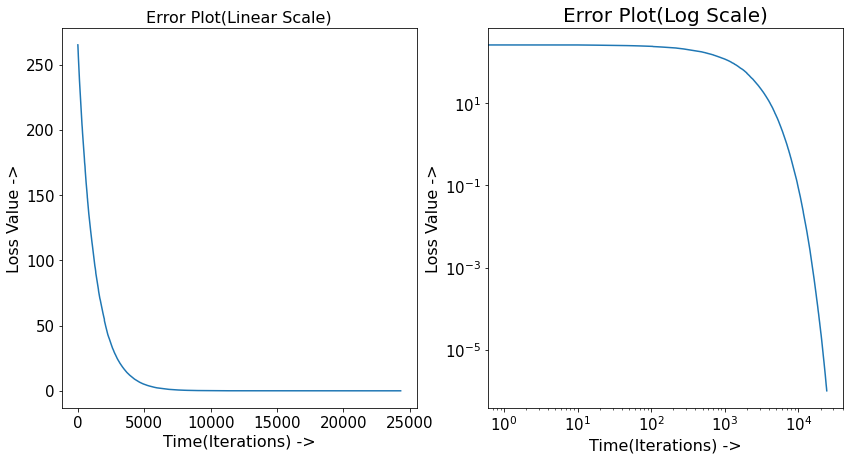

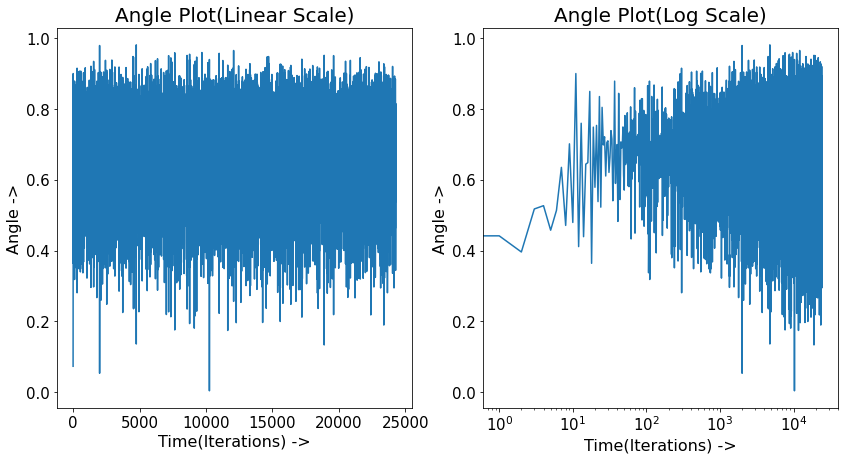

In [114]:
XArr_Orth_mom, AngArr_Orth_mom, ErrorArr_Orth_mom = 
optimized_OrthQ_Momentum_Descent(Q, c, x, 0.1, 0.9, XStar)

plot_Error_Plot(ErrorArr_Orth_mom)
plot_Angle_Plot(AngArr_Orth_mom)


As seen above the result and plots, it is clear that adding a direction orthogonal to the gradient introduces a lot of noise in the aproach to the minimum. There is a lot of variations in the angle of approach and it fluctuates between 0 and 1 but we can't categorically say that it approaches 1. Whereas, the error approaches 0 and the X<sup>k</sup> approaches the minimizer.<br><br>

Adding this factor slows the approach to the minimum by a significant amount. Here, we approach the value of 10<sup>-6</sup> in 24305 iterations whereas in other momentum methods we approached the minimum much faster. 

### What would moving directly towards the minimizer as possible ‘look like’, in terms of the iterates? How does this compare to the behavior of gradient descent and momentum methods as above?


In [115]:
def optimized_Minimizer_Momentum_Descent(Q, c, x, alpha, beta, XStar):
    XArray = [];
    AngleArray = []; 
    iterations = 0;
    error = 10000;
    errorArray = [];
    XStarNorm = np.linalg.norm(XStar, ord = 2)
    XPrev = np.zeros(len(x));
    while(error > 0.000001):
        derivative = np.subtract(np.matmul(Q,x), c)
        Qk = np.subtract(XStar, x)
        opt_Alpha = calculate_Alpha(derivative, Q, Qk)
        opt_Beta = calculate_Beta(derivative, Q, Qk)
        firstPart = np.subtract(x, np.dot(alpha, derivative))
        newX = np.add(firstPart, np.dot(beta, Qk))
        newXNorm = np.linalg.norm(newX, ord = 2)
        XArray.append(newXNorm)
        
        divisor = calculate_Diff_Norm(newX, x)*calculate_Diff_Norm(XStar, x)
        dividend = calculate_Prod1(newX, x, XStar)
        angle = dividend/divisor
        AngleArray.append(angle)
       
        XPrev = x
        x = newX
        
        error = abs(newXNorm - XStarNorm)
        errorArray.append(error)
        iterations += 1
        
    print('Number of Iterations - ', iterations)   
    return XArray, AngleArray, errorArray

Number of Iterations -  9


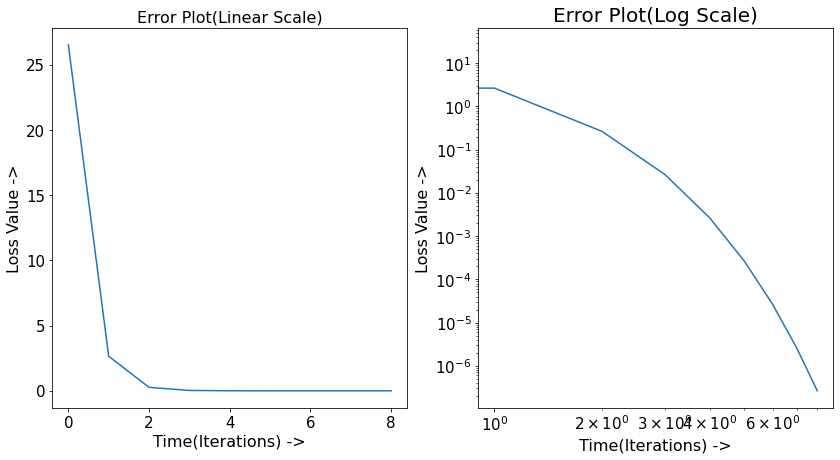

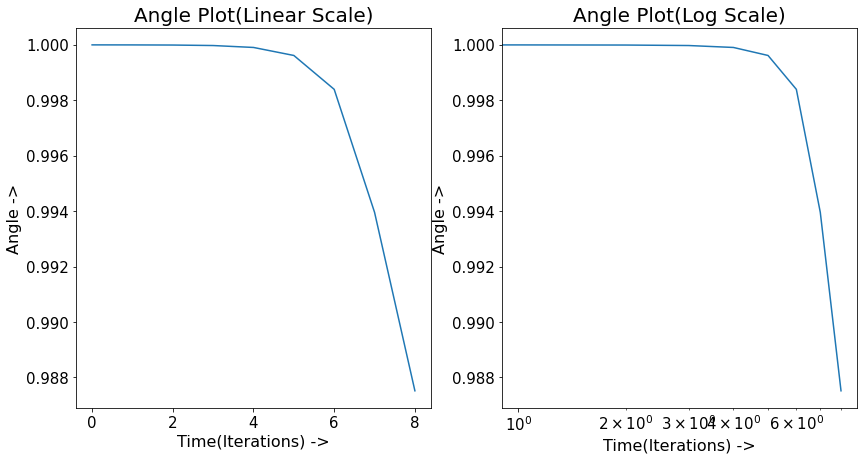

In [116]:
XArr_Min_mom, AngArr_Min_mom, ErrorArr_Min_mom = 
optimized_Minimizer_Momentum_Descent(Q, c, x, 0.01, 0.9, XStar)

plot_Error_Plot(ErrorArr_Min_mom)
plot_Angle_Plot(AngArr_Min_mom)

#### As seen in the plots and the number of iterations which is 9, we can see that the X reaches minimum almost immediately. It is significantly faster than all the other gradient descent methods and momentum methods. Also, the angle of approach approaches the minimum right from the first iteration. 

### Try to come up with a better way of generating an additional direction to move in - note that you cannot use x∗ or Q−1, since if we knew either of these, none of this would be necessary.

As discussed in the office hours, we can use conjugate gradient descent to generate an additional direction to move in.


In [117]:
def better_Direction_Descent(Q, c, x, alpha, beta, XStar):
    XArray = [];
    AngleArray = []; 
    iterations = 0;
    error = 10000;
    errorArray = [];
    XStarNorm = np.linalg.norm(XStar, ord = 2)
    dk = np.subtract(c, np.matmul(Q,x))
    gK = np.subtract(np.matmul(Q,x), c)
    while(error > 0.000001):
        
        better_Direction_Aplha = 
        calculate_Product(np.negative(gK), dk)/calculate_Prod_3(np.transpose(dk), Q, dk)
        
        newX = np.add(x, np.dot(better_Direction_Aplha, dk))
        
        gK = np.subtract(np.matmul(Q,newX), c)
        beta = 
        calculate_Prod_3(np.transpose(gK), Q, dk)/calculate_Prod_3(np.transpose(dk), Q, dk)
        dk = np.add(np.negative(gK), np.dot(beta, dk))
        
        newXNorm = np.linalg.norm(newX, ord = 2)
        XArray.append(newXNorm)
        
        divisor = calculate_Diff_Norm(newX, x)*calculate_Diff_Norm(XStar, x)
        dividend = calculate_Prod1(newX, x, XStar)
        angle = dividend/divisor
        AngleArray.append(angle)
       
        x = newX
        
        error = abs(newXNorm - XStarNorm)
        errorArray.append(error)
        iterations += 1
        
    print('Number of Iterations - ', iterations)
    return XArray, AngleArray, errorArray

Number of Iterations -  10


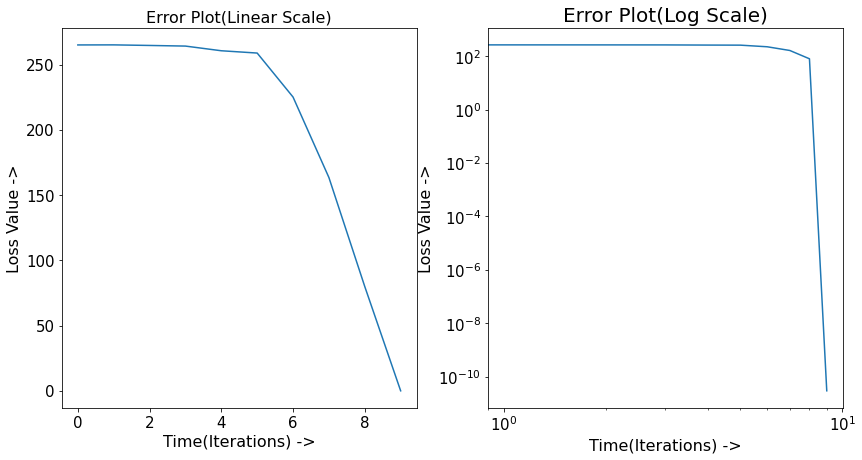

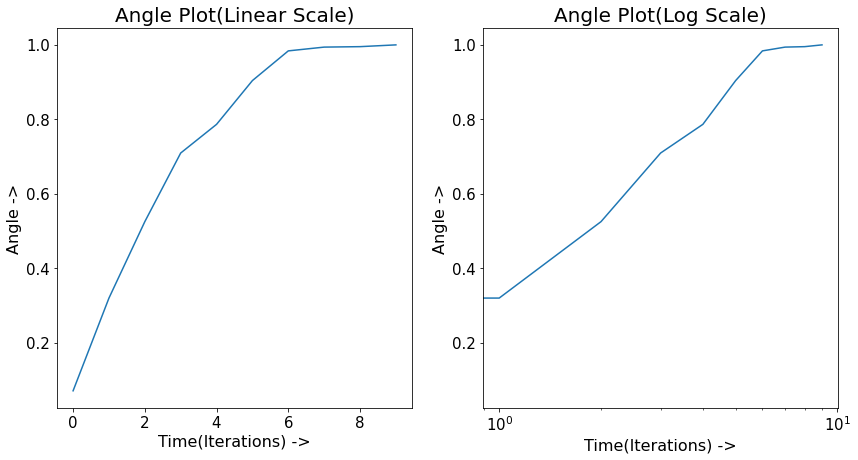

In [118]:
XArr_Better_Dir_mom, AngArr_Better_Dir_mom, ErrorArr_Better_Dir_mom = 
better_Direction_Descent(Q, c, x, 0.01, 0.9, XStar)

plot_Error_Plot(ErrorArr_Better_Dir_mom)
plot_Angle_Plot(AngArr_Better_Dir_mom)

